In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
pd.set_option("display.max_columns",None)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [64]:
cat_1= ['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship',
      'incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city',
     'property_damage','police_report_available','auto_make']

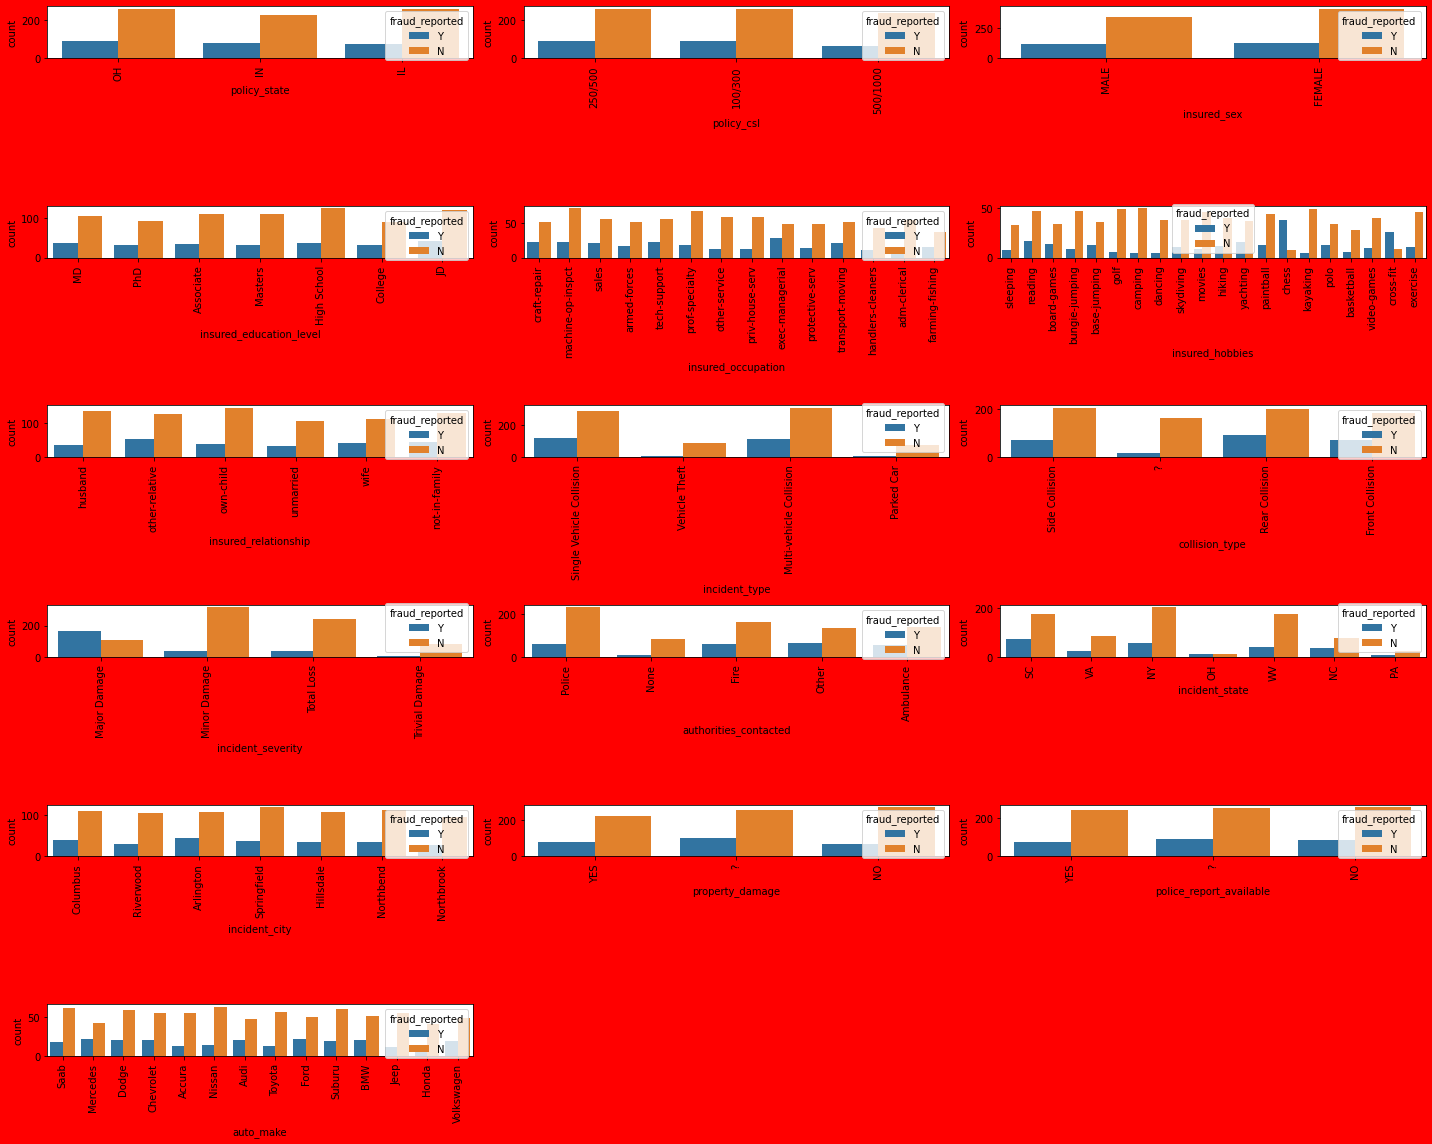

In [65]:
plt.figure(figsize=(20,16),facecolor='red')
plotnumber = 1
for i in cat_1:
    if plotnumber <= 16:
        ax = plt.subplot(6,3,plotnumber)
        sns.countplot(df[i],hue='fraud_reported',data=df)
        plt.xticks(rotation=90,fontsize=10)
        plt.xlabel(i,fontsize=10)
     
        
    plotnumber += 1  
    
plt.tight_layout()

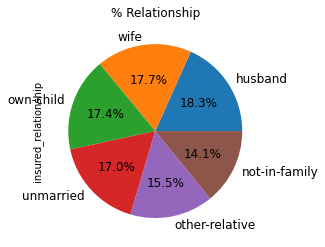

In [66]:
ax = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()

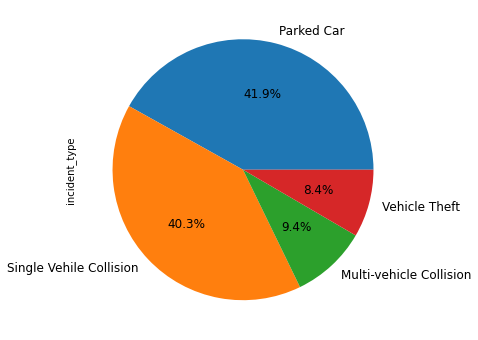

In [67]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_type'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12) 

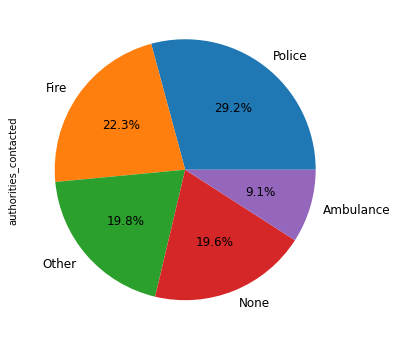

In [68]:
fig = plt.figure(figsize=(10,6))
ax = (df['authorities_contacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12) 

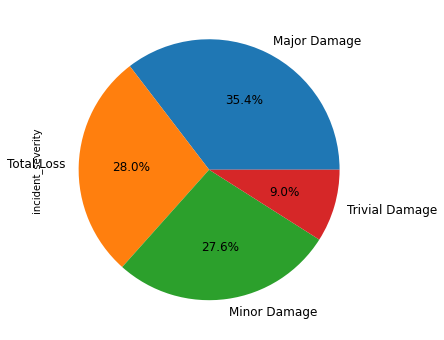

In [69]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_severity'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)

In [70]:
df['fraud_reported'] = df['fraud_reported'].replace({'Y':1,'N':0})

In [71]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [72]:
df[['insured_zip']] = df[['insured_zip']].astype(object)

In [73]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000,NaN


In [74]:
df.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.0,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000,1000,1000,1000,1000,1000,1000,1000,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,0.0
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,995.0,2,7,14,20,6,NaN,NaN,60,4,4,4,5,7,7,1000,NaN,NaN,3,NaN,NaN,3,NaN,NaN,NaN,NaN,14,39,NaN,NaN,NaN
top,NaN,NaN,NaN,01-01-2006,OH,250/500,NaN,NaN,NaN,477695.0,FEMALE,JD,machine-op-inspct,reading,own-child,NaN,NaN,02-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,9935 4th Drive,NaN,NaN,?,NaN,NaN,?,NaN,NaN,NaN,NaN,Saab,RAM,NaN,NaN,NaN
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,2.0,537,161,93,64,183,NaN,NaN,28,419,292,354,292,262,157,1,NaN,NaN,360,NaN,NaN,343,NaN,NaN,NaN,NaN,80,43,NaN,NaN,NaN
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,NaN,NaN,NaN,NaN,NaN,NaN,25126.100000,-26793.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.644000,1.83900,NaN,0.992000,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,0.247000,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,NaN,NaN,NaN,NaN,NaN,NaN,27872.187708,28104.096686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.951373,1.01888,NaN,0.820127,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,0.431483,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-111100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.00000,NaN,0.000000,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,0.000000,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-51500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.00000,NaN,0.000000,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,0.000000,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-23250.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,1.00000,NaN,1.000000,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,0.000000,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,51025.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,3.00000,NaN,2.000000,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,0.000000,NaN


In [75]:
df['csl_per_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]

In [76]:
df['csl_per_person'].value_counts()

250    351
100    349
500    300
Name: csl_per_person, dtype: int64

In [77]:
df['csl_per_accident'].value_counts()

500     351
300     349
1000    300
Name: csl_per_accident, dtype: int64

In [78]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df['incident_period_of_day'] = pd.cut(df.incident_hour_of_the_day, bins, labels=names).astype(object)
df[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

,incident_hour_of_the_day,incident_period_of_day
0,5,early_morning
1,8,morning
2,7,morning
3,5,early_morning
4,20,evening
5,19,evening
6,0,past_midnight
7,23,night
8,21,night
9,14,afternoon


In [79]:
df['vehicle_age'] = 2022 - df['auto_year']  
df['vehicle_age'].head(10)

0    18
1    15
2    15
3     8
4    13
5    19
6    10
7     7
8    10
9    26
Name: vehicle_age, dtype: int64

In [80]:
df = df.drop(columns = [
    'policy_number', 
    'policy_csl',
    'insured_zip',
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
    '_c39', 
    'auto_year', 
    'incident_hour_of_the_day'])

In [81]:
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                           0
policy_state               0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
csl_per_person             0
csl_per_accident           0
incident_period_of_day     0


In [82]:
from sklearn.preprocessing import LabelEncoder

In [85]:
df['property_damage'] = df['property_damage'].replace({'YES':1,'NO':0,'?':0})

In [86]:
df['property_damage'].value_counts()

0    698
1    302
Name: property_damage, dtype: int64

In [87]:
df['police_report_available'] = df['police_report_available'].replace({'YES':1,'NO':0,'?':0})

In [88]:
df['police_report_available'].value_counts()

0    686
1    314
Name: police_report_available, dtype: int64

In [89]:
lab_enc = LabelEncoder()

In [90]:
for t in df.columns:
    if df[t].dtypes == 'object':
        print(t)
        df[t] = lab_enc.fit_transform(df[t])

policy_state
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
incident_type
collision_type
incident_severity
authorities_contacted
incident_state
incident_city
auto_make
auto_model
csl_per_person
csl_per_accident
incident_period_of_day


In [91]:
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,csl_per_person,csl_per_accident,incident_period_of_day,vehicle_age
0,328,48,2,1000,1406.91,0,1,4,2,17,0,53300,0,2,3,0,4,4,1,1,1,1,2,1,71610,6510,13020,52080,10,1,1,1,2,1,18
1,228,42,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,0,1,4,5,5,1,0,0,0,0,5070,780,780,3510,8,12,1,1,2,4,15
2,134,29,2,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,2,1,4,1,1,3,0,2,3,0,34650,7700,3850,23100,4,30,0,0,1,4,15
3,256,41,0,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,1,0,4,2,0,1,0,1,2,0,63400,6340,6340,50720,3,34,1,1,2,1,8
4,228,44,0,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,0,1,2,1,0,1,0,0,1,0,6500,1300,650,4550,0,31,0,2,0,2,13


<AxesSubplot:>

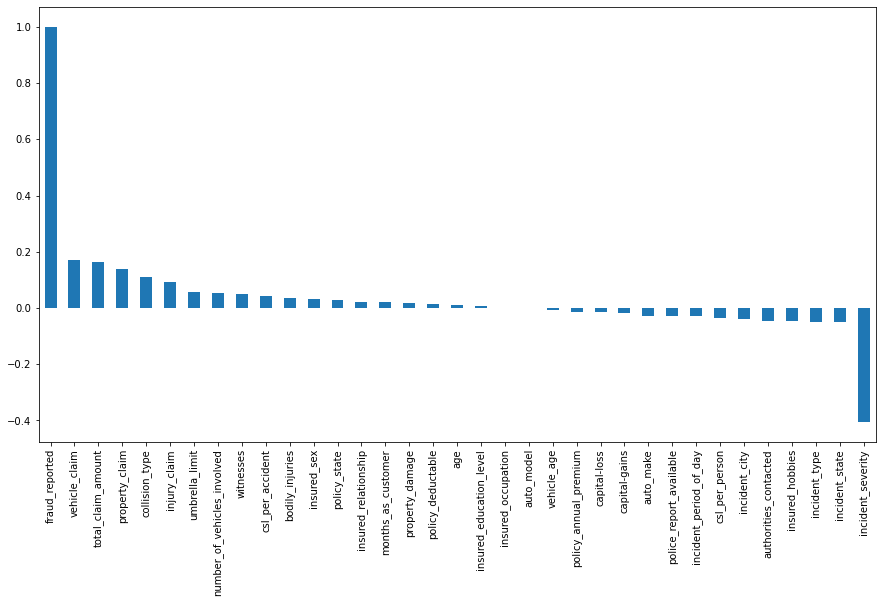

In [98]:
plt.figure(figsize=(15,8))
df.corr()['fraud_reported'].sort_values(ascending = False).plot(kind='bar')

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()

In [94]:
X = df.drop('fraud_reported',axis=1)
y = df.fraud_reported

In [95]:
X_scaler = scaler.fit_transform(X)

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.25,random_state=355)

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,precision_score,confusion_matrix,recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,cross_val_predict

In [100]:
def print_score(clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train)
        print("\n ===Train result===")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred = clf.predict(X_test)
        print("\n ===Test result===")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        print('\n \n Test classification report \n',classification_report(y_test,pred,digits=2))    

In [101]:
svc = SVC()
svc.fit(X_train,y_train)
print_score(svc,X_train,X_test,y_train,y_test,train=True)
print_score(svc,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
Accuracy Score:83.73%

 ===Test result===
Accuracy Score:72.40%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.73      0.99      0.84       182
           1       0.00      0.00      0.00        68

    accuracy                           0.72       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.53      0.72      0.61       250



In [102]:
gbdt = GradientBoostingClassifier()
gbdt.fit(X_train,y_train)
print_score(gbdt,X_train,X_test,y_train,y_test,train=True)
print_score(gbdt,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
Accuracy Score:97.87%

 ===Test result===
Accuracy Score:79.20%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       182
           1       0.63      0.56      0.59        68

    accuracy                           0.79       250
   macro avg       0.74      0.72      0.73       250
weighted avg       0.79      0.79      0.79       250



In [103]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print_score(rf,X_train,X_test,y_train,y_test,train=True)
print_score(rf,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
Accuracy Score:100.00%

 ===Test result===
Accuracy Score:73.20%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.75      0.95      0.84       182
           1       0.52      0.16      0.25        68

    accuracy                           0.73       250
   macro avg       0.64      0.55      0.54       250
weighted avg       0.69      0.73      0.68       250



In [104]:
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)
print_score(dc,X_train,X_test,y_train,y_test,train=True)
print_score(dc,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
Accuracy Score:100.00%

 ===Test result===
Accuracy Score:74.80%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       182
           1       0.54      0.51      0.53        68

    accuracy                           0.75       250
   macro avg       0.68      0.67      0.68       250
weighted avg       0.74      0.75      0.75       250



In [105]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print_score(lr,X_train,X_test,y_train,y_test,train=True)
print_score(lr,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
Accuracy Score:79.87%

 ===Test result===
Accuracy Score:74.00%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.77      0.92      0.84       182
           1       0.55      0.26      0.36        68

    accuracy                           0.74       250
   macro avg       0.66      0.59      0.60       250
weighted avg       0.71      0.74      0.71       250



In [106]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print_score(knn,X_train,X_test,y_train,y_test,train=True)
print_score(knn,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
Accuracy Score:80.13%

 ===Test result===
Accuracy Score:70.80%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.73      0.94      0.82       182
           1       0.35      0.09      0.14        68

    accuracy                           0.71       250
   macro avg       0.54      0.51      0.48       250
weighted avg       0.63      0.71      0.64       250



GradientBoostingClassifier is better than all but it seems overfitting.

In [164]:
gbdt = GradientBoostingClassifier(max_depth=2,learning_rate=0.1,min_samples_split=2,n_estimators=132,min_samples_leaf=5)
gbdt.fit(X_train,y_train)
print_score(gbdt,X_train,X_test,y_train,y_test,train=True)
print_score(gbdt,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
Accuracy Score:94.13%

 ===Test result===
Accuracy Score:82.40%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       182
           1       0.69      0.63      0.66        68

    accuracy                           0.82       250
   macro avg       0.78      0.76      0.77       250
weighted avg       0.82      0.82      0.82       250



Finally we have tune our model having accuracy of 82.40 % accuracy